<a href="https://colab.research.google.com/github/arturbernardo/convolutionBlackAndWhite/blob/main/convolutional_matrix_bw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image
from google.colab import drive
from matplotlib import pyplot as plt
import scipy.signal
from PIL import Image, ImageFilter 
import cv2 
import numpy as np

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
kernel_edgedetection = np.matrix([[-1, -1, -1],
                                 [-1, 8.5, -1],
                                 [-1, -1, -1]])

In [ ]:
blur = np.matrix([[0.08, 0.08, 0.08],
                  [0.08, 0.5, 0.08],
                  [0.08, 0.08, 0.08]])

In [ ]:
edge = np.matrix([[-1, -1, -1],
                  [-1, 8, -1],
                  [-1, -1, -1]])

In [ ]:
horizontal_edges = np.matrix([[1, 0, -1],
                              [2, 0, -2],
                              [1, 0, -1]])

In [ ]:
vertical_edges = np.matrix([[ 1,  2,  1],
                            [ 0,  0,  0],
                            [-1, -2, -1]])

In [ ]:
image = Image.open(r"/content/drive/MyDrive/python_general/pikachu.png")
img_grey = image.convert('L')

In [ ]:
img_grey.size

(868, 1138)

In [ ]:
# 170, 200 Van Gogh
# 800, 380 Grumpu

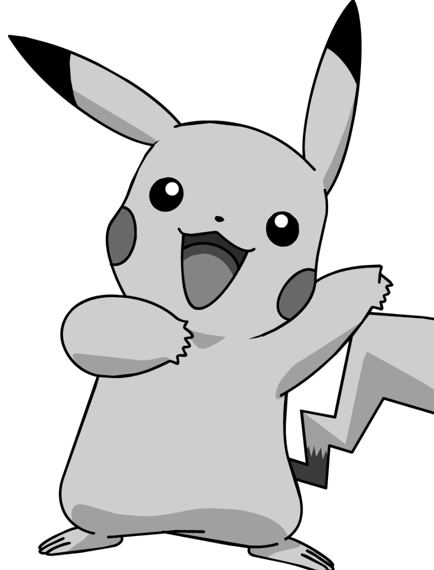

In [ ]:
new_image = img_grey.resize((434, 570)) # 170, 200)
new_image

In [ ]:
matrix = np.array(new_image)
matrix.shape


(570, 434)

In [ ]:
def reduce_matrix(to_be_reduced):
  b = np.sum(to_be_reduced[:,:]*vertical_edges[:,:]) 
  return b

x=np.zeros(shape=(matrix.shape[0],matrix.shape[1]))

for i in range(len(matrix)):
  for j in range(len(matrix[i])):
    if (i+1 >= matrix.shape[0]):
      break
    if (j+1 >= matrix.shape[1]):
      break
    pos_matrix = matrix[i-1:i+2,j-1:j+2]
    if (pos_matrix.size != 0):
      x[i, j] = reduce_matrix(pos_matrix)
    else:
      x[i, j] = 1



In [ ]:
x

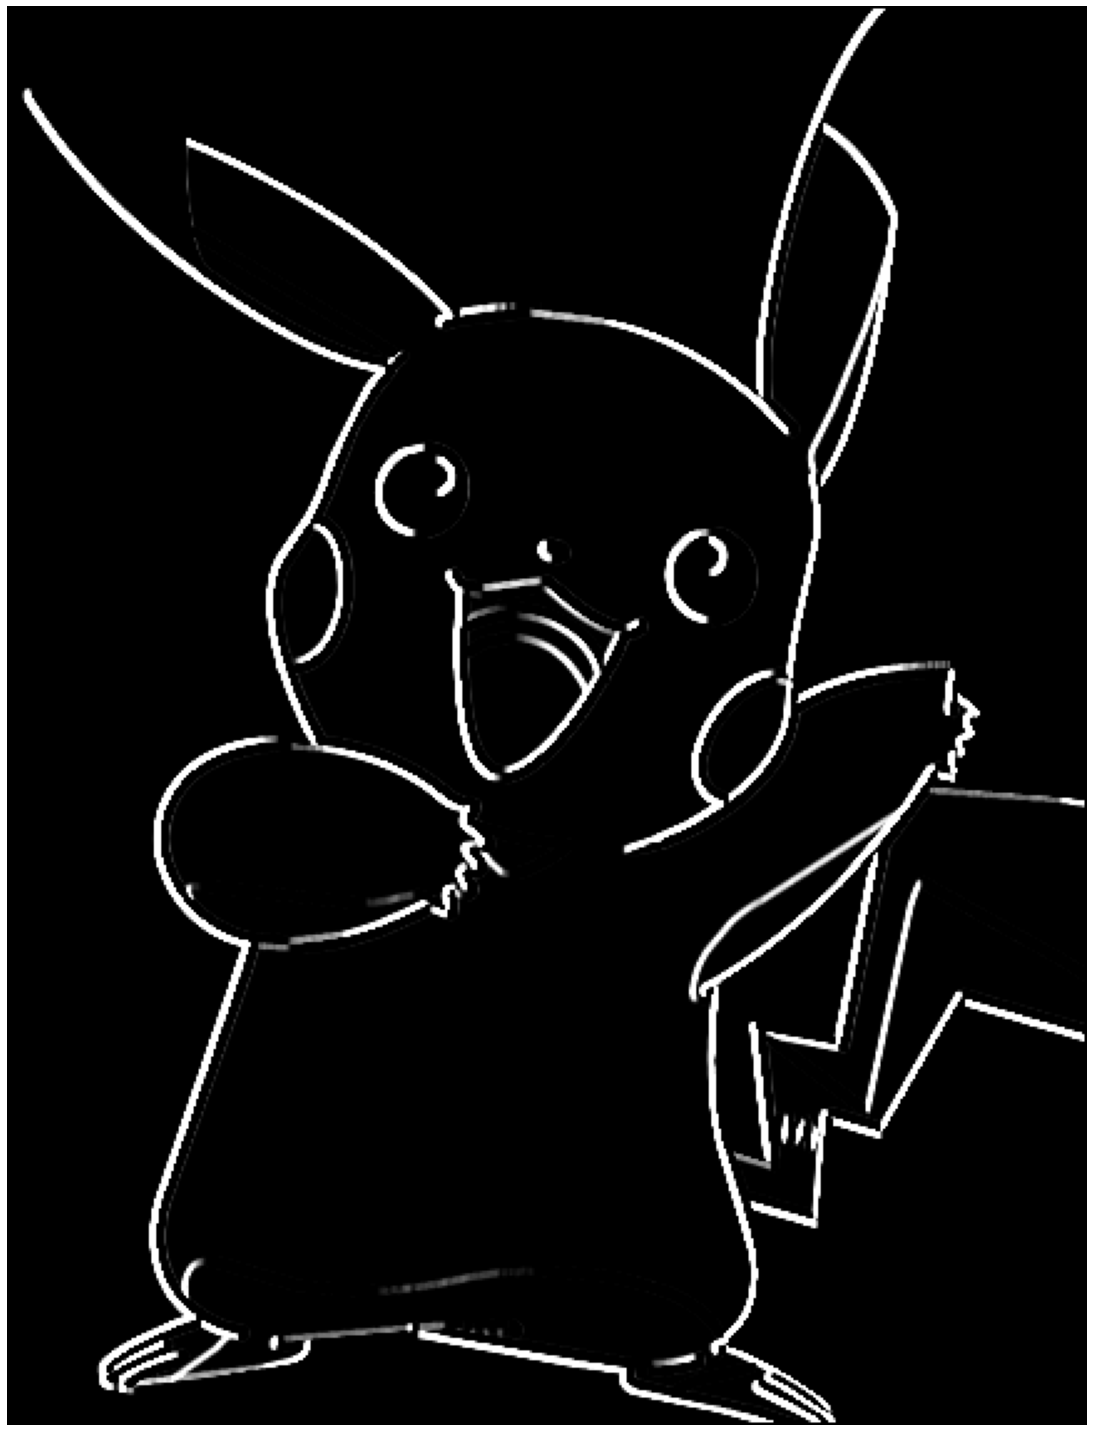

In [ ]:
new_image = Image.fromarray(x)
# new_image.save("new_image.jpeg")
plt.imshow(new_image)


# plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.autolayout"] = True

plt.axis("off")
plt.show()